# Module 2: Case Study - PCA for Fault Detection

Welcome to the Hands-on Session for PCA Machine Learning.

Our case study is about distillation column. The tray efficiency is compromised at a given set of time. But we don't have an indicator or some sort of label to indicate what time the fault occur. But we know something is wrong

This session will demonstrate how machine learning can be used to detect fault that occur in the Distillation Column

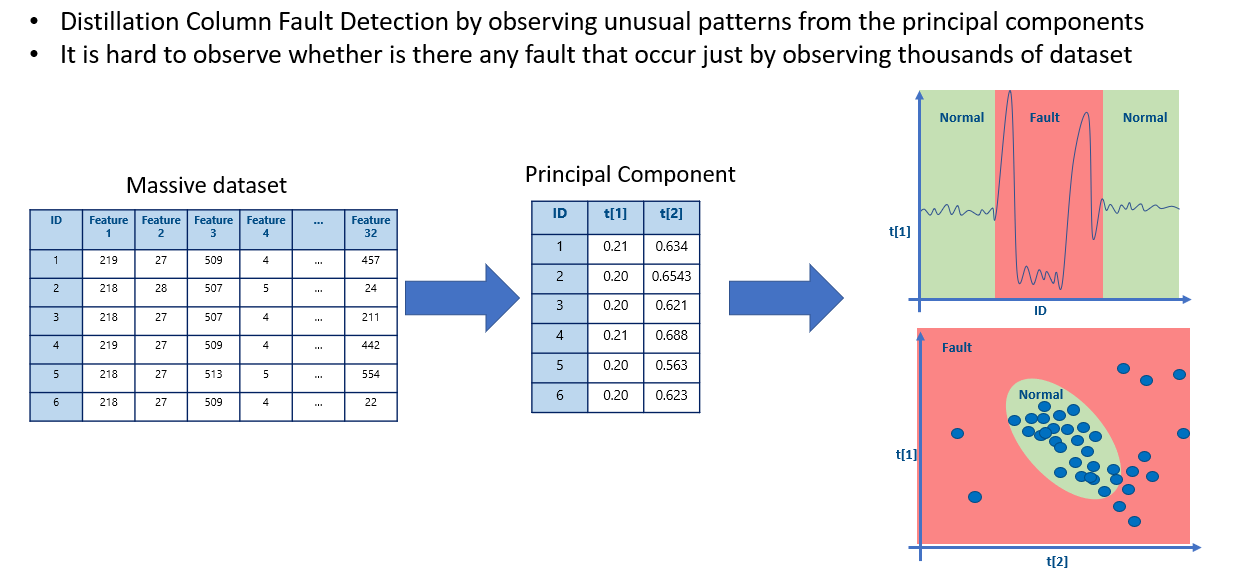



**Steps:**

1.   Importing Libraries
2.   Importing Dataset
3.   Data Pre-processing
4.   Data Standardization
5.   PCA projection
6.   Score Scatter Plot
7.   Score Line Plot
8.   Export PCA data to Excel

**Important Steps in PCA**
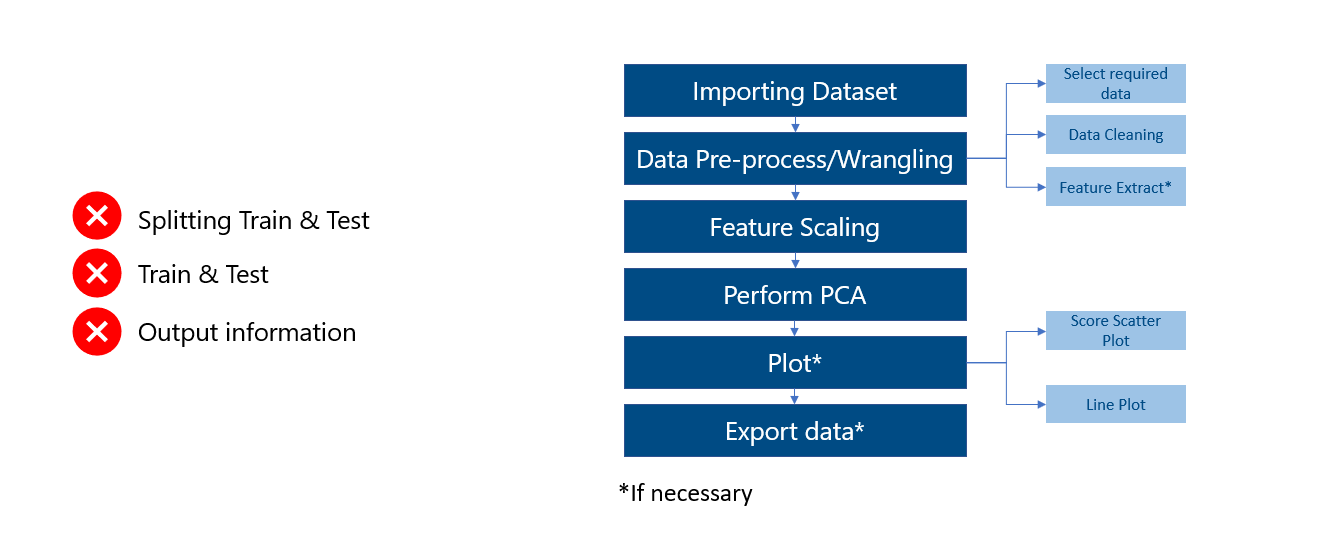

**An Oversimplified Process Illustration:** 


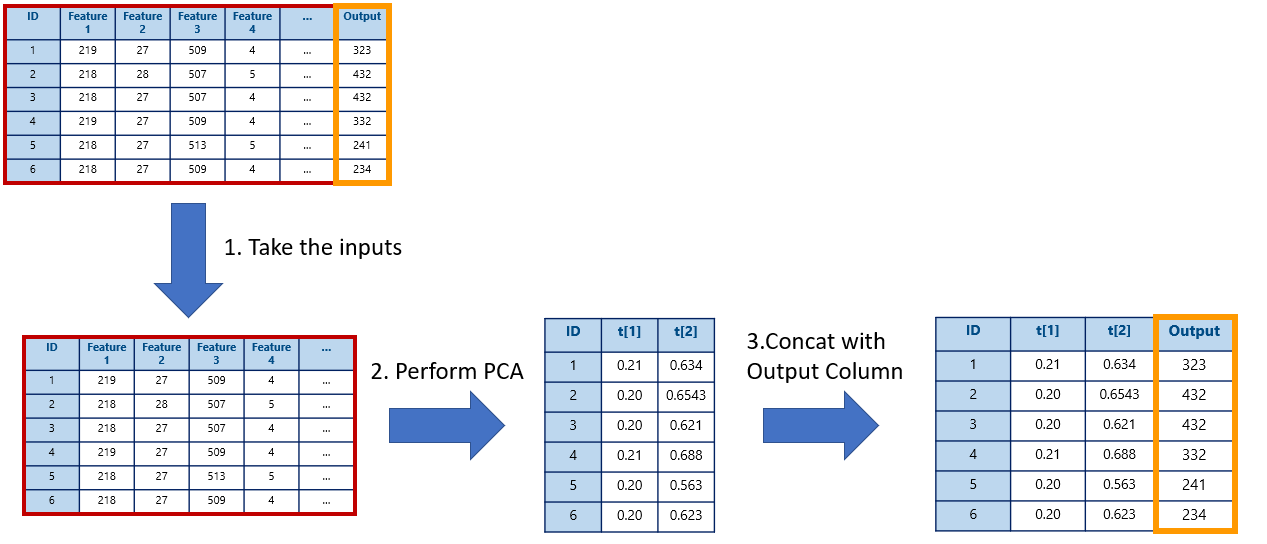


## Step 1: Importing Libraries

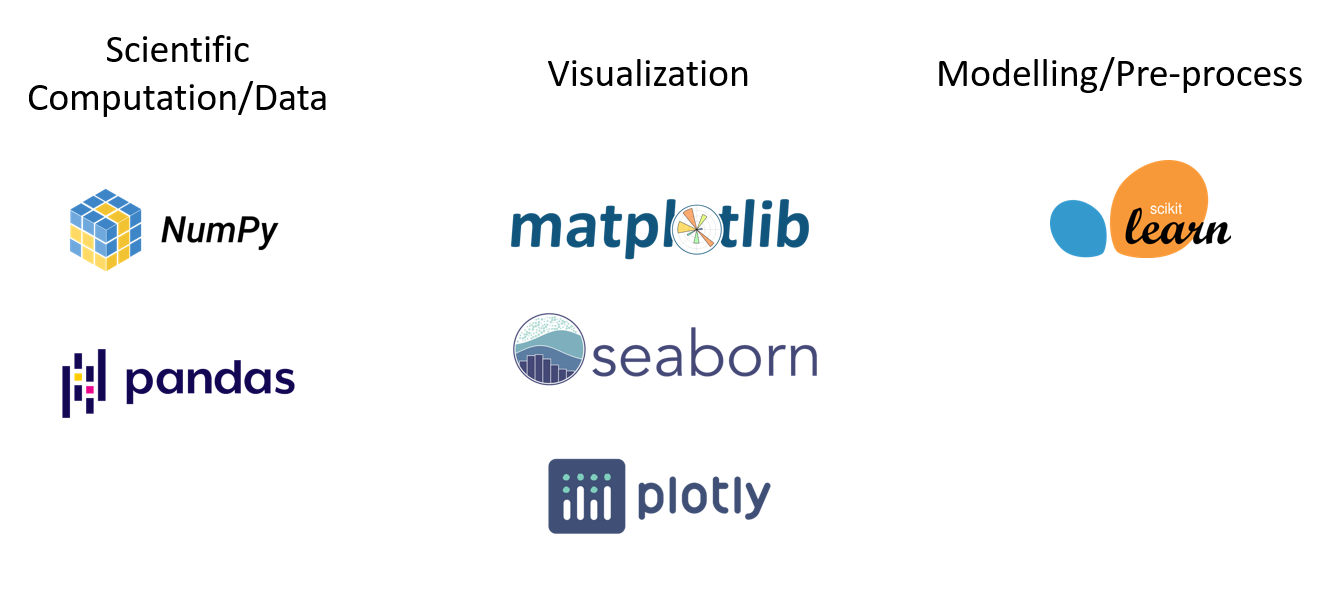


In [1]:
# Basic Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Required Sub-library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step 2: Importing Dataset

In [2]:
#Importing Dataset
df = pd.read_excel('/content/17112021.xlsx')

In [3]:
df.tail()

,Time,Condenser - Liquid Percent Level,Condenser - Vessel Pressure,Main Tower - Stage Temperature (8__Main Tower),Reboiler - Vessel Liq Percent Level,Feed2 - Master Comp Mass Frac (TetraHyFuran),Feed2 - Master Comp Mass Frac (Toluene),Feed2 - Mass Flow,Main Tower - Stage Liq Mass Frac (1__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (1__Main Tower-Toluene),Main Tower - Stage Liq Mass Frac (10__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (10__Main Tower-Toluene),To Reboiler - Mass Flow,To Condenser - Mass Flow,STATUS
996,35880,49.9998,101.301,88.9808,50.0163,0.44,0.56,3725.85,0.863320,0.136680,0.043374,0.956626,6723.25,2755.00,NORMAL
997,35910,49.9996,101.301,88.9797,50.0162,0.44,0.56,3725.82,0.863323,0.136677,0.043376,0.956624,6723.12,2755.28,NORMAL
998,35940,50.0001,101.301,88.9806,50.0158,0.44,0.56,3725.85,0.863321,0.136679,0.043373,0.956627,6723.10,2755.37,NORMAL
999,35970,50.0003,101.300,88.9811,50.0154,0.44,0.56,3725.89,0.863319,0.136681,0.043371,0.956629,6723.16,2755.50,NORMAL
1000,36000,50.0002,101.299,88.9812,50.0150,0.44,0.56,3725.92,0.863318,0.136682,0.043370,0.956630,6723.20,2755.45,NORMAL


## Step 3: Data Pre-processing

Ensure that the dataset:

- has only the required data/values/columns
- has no missing values
- if missing data is present, substitute it with values (previous cell value/median/average)
- separate features (X) and dependant variables (y)

## **REMEMBER!**

PCA is an unsupervised learning, so we will dismiss the STATUS column before executing PCA

However, after PCA is generated, we recombine the PCA table with the STATUS column to illustrate that PCA can be used for fault detection\

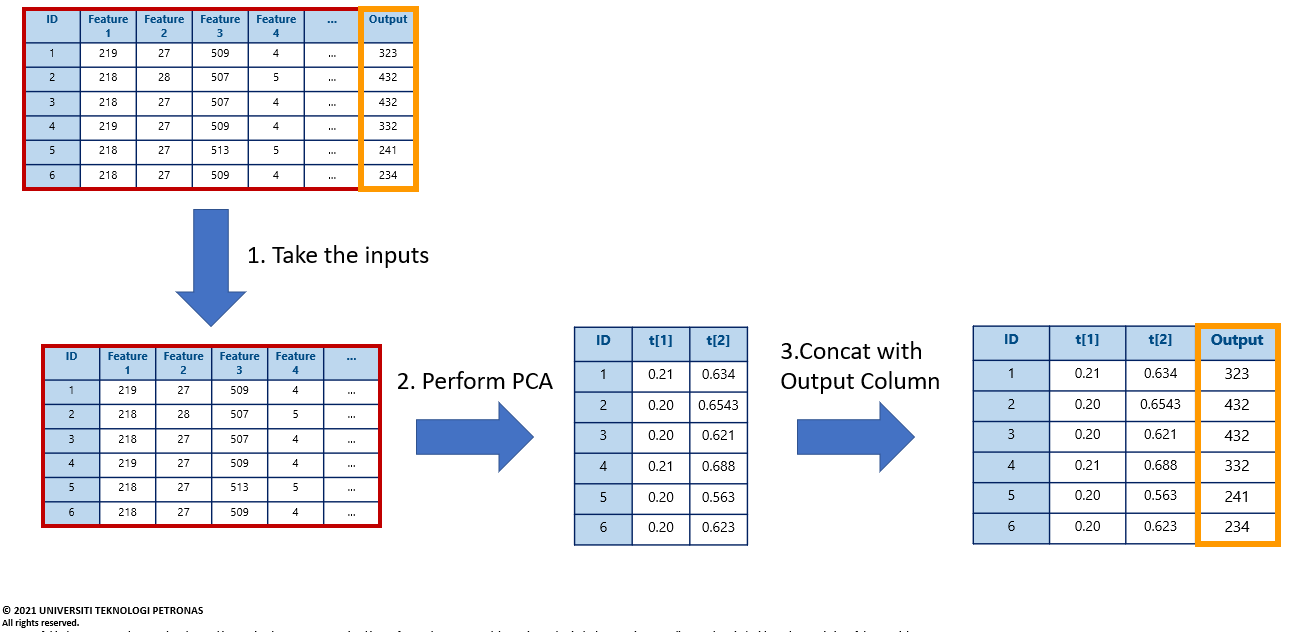

### Section 3.1 : Identify and Deal with Missing/Dirty Data





In [4]:
# Which Column has Missing Data
nan_col = df.isna().any()

#Which rows have Missing Data
nan_row = df.isna().any(axis=1)
nan_row = df[nan_row]

### Section 3.2 : Replacing NaN with values

In [5]:
df.fillna(df.median(),inplace=True)         # replace all NaN in column with median

### Section 3.3: Verify that there are no missing data

- Ensure the outcome is:
```
    NaN Present:  False
    No NaN present


In [6]:
# Which Column has Missing Data
nan_col = df.isna().any()

#Which rows have Missing Data
nan_row = df.isna().any(axis=1)
nan_row = df[nan_row]

In [7]:
nan_row

,Time,Condenser - Liquid Percent Level,Condenser - Vessel Pressure,Main Tower - Stage Temperature (8__Main Tower),Reboiler - Vessel Liq Percent Level,Feed2 - Master Comp Mass Frac (TetraHyFuran),Feed2 - Master Comp Mass Frac (Toluene),Feed2 - Mass Flow,Main Tower - Stage Liq Mass Frac (1__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (1__Main Tower-Toluene),Main Tower - Stage Liq Mass Frac (10__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (10__Main Tower-Toluene),To Reboiler - Mass Flow,To Condenser - Mass Flow,STATUS


### Section 3.4 : Extracting Features and Dependant Variables

In [25]:
'''
[DESCRITPTION]

x         : Process Variables                             -   this dataset will be projected to PCA
y         : STATUS (dependant variable)                   -   this will be used to concat (combine) the output column with the PCA column in Step 5
features  : name of columns in dataframe
time      : 'Time (s)'
'''


x         =   df.iloc[:,1:-1]
y         =   df.iloc[:,-1]
features  =   df.columns
time      =   df.loc[:,['Time']]

## Step 4: Data Standardization (Feature Scaling)

- A process to normalize or standardize the range of data<br><br>
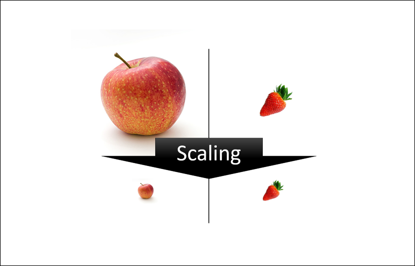

<br>
<br>

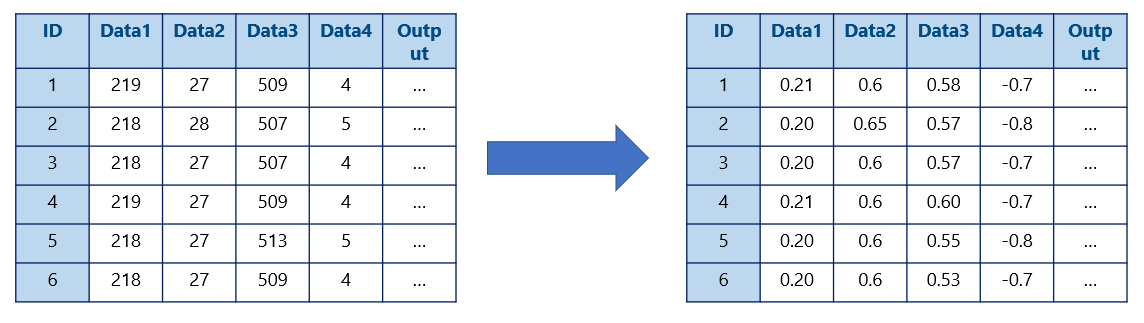

In [26]:
# Standardizing Process Variables (x)
x = x - np.mean(x,axis=0)

# Reassing the Standardized Process Variables (x) as Pandas Data Frame
x = pd.DataFrame(data = x, 
                 columns = features[1:-1]
                 )
x

,Condenser - Liquid Percent Level,Condenser - Vessel Pressure,Main Tower - Stage Temperature (8__Main Tower),Reboiler - Vessel Liq Percent Level,Feed2 - Master Comp Mass Frac (TetraHyFuran),Feed2 - Master Comp Mass Frac (Toluene),Feed2 - Mass Flow,Main Tower - Stage Liq Mass Frac (1__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (1__Main Tower-Toluene),Main Tower - Stage Liq Mass Frac (10__Main Tower-TetraHyFuran),Main Tower - Stage Liq Mass Frac (10__Main Tower-Toluene),To Reboiler - Mass Flow,To Condenser - Mass Flow
0,-2.002997e-04,-0.000017,-0.001455,0.003129,2.053913e-15,2.886580e-15,-0.010679,0.002480,-0.002480,0.000039,-0.000038,-0.235554,-1.055345
1,-2.997003e-07,-0.000017,-0.000555,0.003129,2.053913e-15,2.886580e-15,-0.010679,0.002483,-0.002483,0.000040,-0.000039,-0.275554,-1.125345
2,2.997003e-04,0.000983,-0.000955,0.003029,2.053913e-15,2.886580e-15,-0.030679,0.002483,-0.002483,0.000037,-0.000037,-0.425554,-1.545345
3,2.997003e-04,0.000983,0.000045,0.002929,2.053913e-15,2.886580e-15,-0.050679,0.002483,-0.002483,0.000036,-0.000036,-0.445554,-1.885345
4,9.970030e-05,0.000983,0.000145,0.002929,2.053913e-15,2.886580e-15,-0.040679,0.002483,-0.002483,0.000036,-0.000036,-0.455554,-1.825345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-2.002997e-04,0.000983,0.000245,0.016429,2.053913e-15,2.886580e-15,-0.030679,0.002481,-0.002481,0.000036,-0.000036,-0.375554,-1.895345
997,-4.002997e-04,0.000983,-0.000855,0.016329,2.053913e-15,2.886580e-15,-0.060679,0.002484,-0.002484,0.000039,-0.000038,-0.505554,-1.615345
998,9.970030e-05,0.000983,0.000045,0.015929,2.053913e-15,2.886580e-15,-0.030679,0.002482,-0.002482,0.000035,-0.000035,-0.525554,-1.525345
999,2.997003e-04,-0.000017,0.000545,0.015529,2.053913e-15,2.886580e-15,0.009321,0.002480,-0.002480,0.000033,-0.000033,-0.465554,-1.395345


## Step 5: PCA Projection into 2-Dimensional Components

In [27]:
pca = PCA(n_components=2)                                                                 # Define PCA model and state the number of components
principalComponents = pca.fit_transform(x)                                                # Perform PCA to data 'x'

principalDF = pd.DataFrame(data = principalComponents, columns = ['t[1]', 't[2]'])        # Compile the principal components into a DataFrame

In [28]:
#View the DataFrame:
principalDF

,t[1],t[2]
0,-1.080905,0.010348
1,-1.158218,-0.012060
2,-1.601136,-0.064466
3,-1.936288,-0.010840
4,-1.880333,-0.031990
...,...,...
996,-1.930379,0.061047
997,-1.687563,-0.131536
998,-1.604947,-0.165185
999,-1.465109,-0.129641


## Step 6: Plotting Scores Line Plot

### Section 6.1: Concatenate DataFrame for visualising

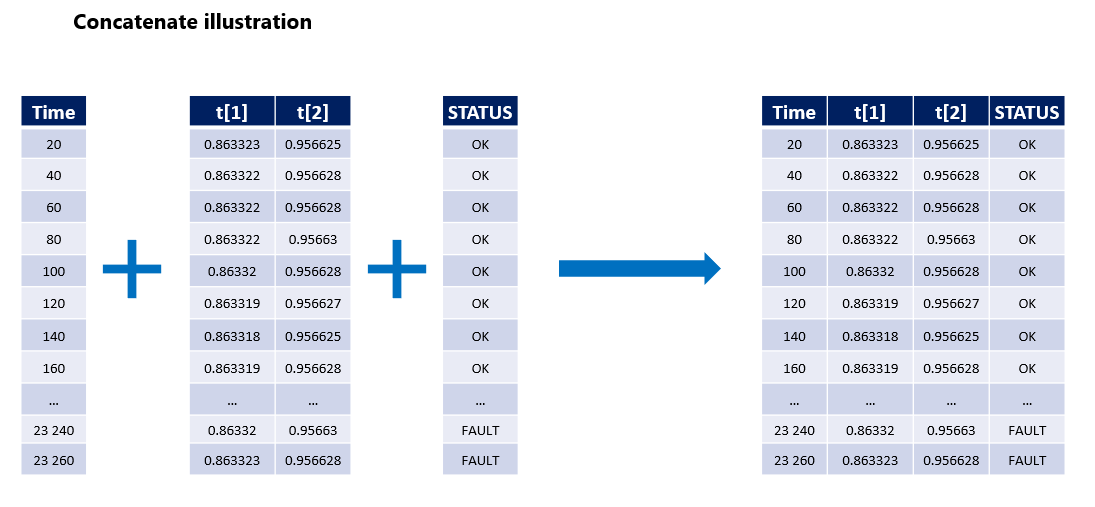

In [29]:
gen_list = pd.concat([time,principalDF,y],axis = 1)                              # concatenante necessary columns for visualization

In [30]:
# View the DataFrame:
gen_list.tail()


,Time,t[1],t[2],STATUS
996,35880,-1.930379,0.061047,NORMAL
997,35910,-1.687563,-0.131536,NORMAL
998,35940,-1.604947,-0.165185,NORMAL
999,35970,-1.465109,-0.129641,NORMAL
1000,36000,-1.504878,-0.074586,NORMAL


### Section 6.2: Generate Plots

In [31]:
import plotly.express as px

fig = px.scatter(gen_list, 
              x = 'Time',
              y="t[1]", 
              color="STATUS",
              title="Fault Detection in Distillation Column using PCA (t[1])")

fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

In [32]:
fig = px.scatter(gen_list,
                 x = 'Time',
                 y="t[2]",
                 color="STATUS"
                 )
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

In [33]:
fig = px.scatter(gen_list, 
                 x ='t[1]',
                 y="t[2]", 
                color="STATUS", 
                 title = 'Principal Component t[1] vs t[2]')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

### Section 6.3: Visualising Hotteling T2 using PCA library

In [34]:
# First, you need to install the library first
!pip install pca

In [36]:
# now lets import the library we installed

from pca import pca

In [37]:
# Just now, we run PCA using Scikit-Learn. Now we use the pca libraries instead. However, the step is almost the same
'''
[PCA using Scikit Learn]


pca = PCA(n_components=2)                                                                 # Define PCA model and state the number of components
principalComponents = pca.fit_transform(x)                                                # Perform PCA to data 'x'
'''


# We start with defining the PCA model
pca_model = pca(n_components=2)

# Then we run or what we call "fit" the model with data 'x'
pca_2 = pca_model.fit_transform(x)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [49]:
# You can see the ouput by calling out the pca_2

pca_2

{'PC':            PC1       PC2
 0    -1.080905  0.010348
 1    -1.158218 -0.012060
 2    -1.601136 -0.064466
 3    -1.936288 -0.010840
 4    -1.880333 -0.031990
 ...        ...       ...
 996  -1.930379  0.061047
 997  -1.687563 -0.131536
 998  -1.604947 -0.165185
 999  -1.465109 -0.129641
 1000 -1.504878 -0.074586
 
 [1001 rows x 2 columns],
 'explained_var': array([0.98540795, 0.99924361]),
 'loadings':      Condenser - Liquid Percent Level  ...  To Condenser - Mass Flow
 PC1                          0.000043  ...                  0.972876
 PC2                         -0.001857  ...                 -0.224823
 
 [2 rows x 13 columns],
 'model': PCA(n_components=2),
 'outliers':        y_proba   y_score  y_bool  y_bool_spe  y_score_spe
 0     0.954807  0.671410   False       False     1.080955
 1     0.947973  0.726885   False       False     1.158281
 2     0.896416  1.086452   False       False     1.602433
 3     0.856322  1.329669   False       False     1.936319
 4     0.862343  

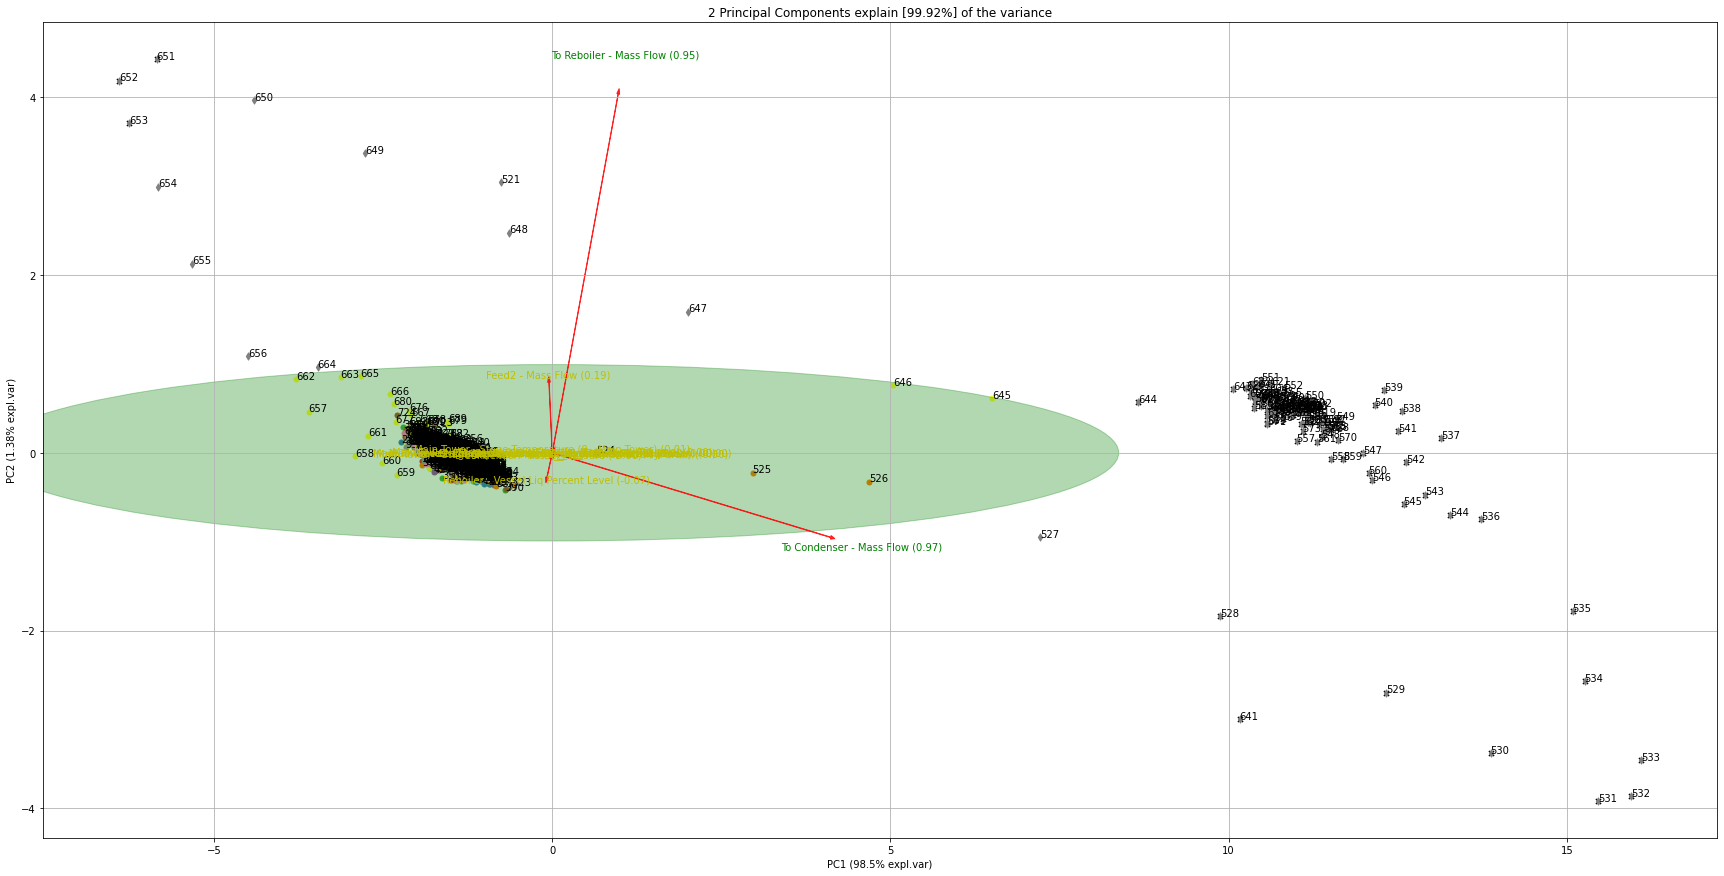

In [48]:
#Now, lets visualise the plot

fig = pca_model.biplot(figsize=(30, 15),
                   legend = False, 
                   SPE=True, 
                   hotellingt2=True)

## Step 7: Export to Excel

In [18]:
gen_list.to_excel('PCA.xlsx')

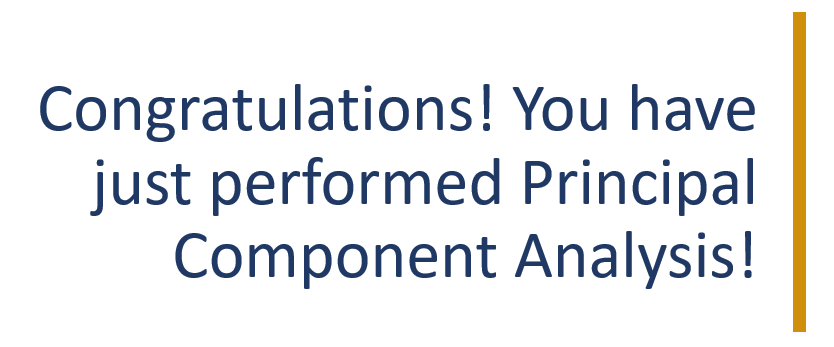